In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Prior data samples
n = 100
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

In [14]:
# Define the kernel function
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)


In [25]:
# Generate the covariance matrix corresponding to these data samples
param = 0.1
K_ss = kernel(Xtest, Xtest, param)

In [26]:
# One last thing to calculate before defining the Gaussian Process: square root of the variance of the data samples
# to calculate the square root of a matrix, we use Cholesky Decomposition
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n))

In [27]:
# Now that we know the mean and variance, we have defined our GP
# Let us sample from this distribution
f_prior = np.dot(L, np.random.normal(size=(n,3)))

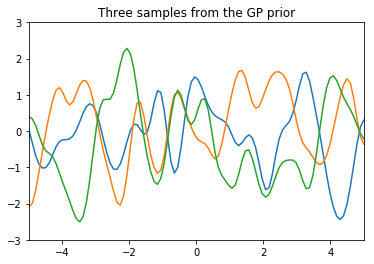

In [28]:
# Let's plot the priors
plt.plot(Xtest, f_prior)
plt.axis([-5, 5, -3, 3])
plt.title('Three samples from the GP prior')
plt.show()